In [2]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
from scipy import stats
from scipy.stats import kurtosistest

In [3]:
df = pd.read_csv("data/01-dataframe_fumadores.csv", index_col = 0).reset_index()
df.head(2)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.9240
1,11,62,female,26.29,0,yes,southeast,27808.7251


In [5]:
df2 = pd.read_csv("data/05-bmi_normal.csv", index_col = 0).reset_index()
df2.head(2)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.9240
1,1,18,male,33.77,1,no,southeast,1725.5523


# Pair Programming Test Estadísticos

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

- ¿Qué **diferencia** existe el error de tipo I y el error de tipo II?

>- El error de tipo 1 se comete si rechazamos la hipótesis nula cuando es verdadera.

>- El error de tipo 2 es cuando la hipótesis nula es falsa y no la rachazamos.

- ¿Qué es la **asimetría**?


Es cuando la distribución de los datos de una variable carece de simetría con respecto a la media.

La distribución puede estar sesgada a la derecha (si tiene la mayor parte de los datos a la izquierda), o a la izquierda (si tiene la mayor parte de los datos a la derecha).

- ¿Es vuestra variable respuesta **asimétrica**?


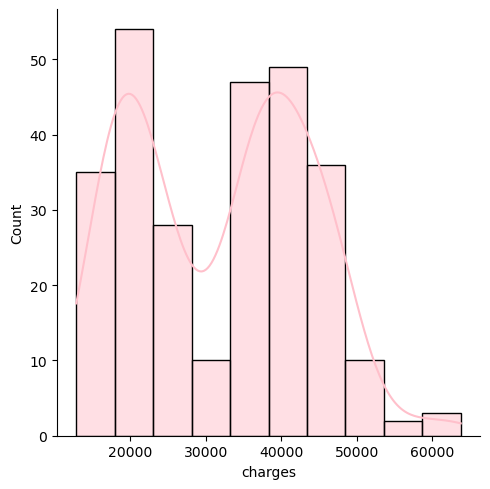

In [7]:
#  forma visual
sns.displot(df['charges'], kde = True, color = "pink")
plt.show();

In [13]:
#  forma numérica
df['charges'].skew()

0.12821727537875743

Nuestra distribución es **asimetrica** **positiva**( ya que el valor es positivo) y por tanto los datos, son asimetricos positivos,por lo tanto,  **no** son normales.

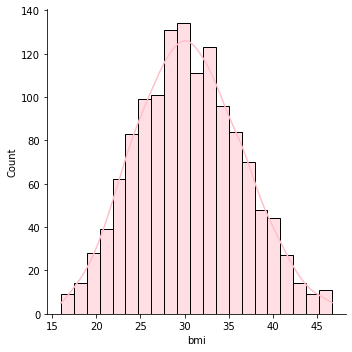

In [6]:
#  forma visual
sns.displot(df2['bmi'], kde = True, color = "pink")
plt.show();

In [7]:
#  forma numérica
df2['bmi'].skew()

0.15814069198039665

- ¿Qué tipo de **curtosis** presenta vuestra variable respuesta?

In [15]:
kurtosistest(df["charges"])

KurtosistestResult(statistic=-7.76298666255981, pvalue=8.295233900915478e-15)

¿Cuál es la H0 en este test?

- H0: nuestros datos son normales

- H1: nuestros datos son no normales. 

> Por lo tanto, si el p-valor > 0.05 no podemos rechazar la hipótesis nula, y por lo tanto nuestros valores son normales con un intervalo de confianza del 95%. 

Tenemos dos casos: 

- p-valor del test = 0.15 ==> p-valor del test > p-valor (alfa) == DATOS NORMALES

- p-valor del test = 4.656e-152 ==> p-valor del test < p-valor (alfa) == DATOS NO NORMALES


- ¿Es vuestra variable respuesta **normal**? Demostrarlo visual y analíticamente.

In [11]:
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.9395521879196167, pvalue=3.6251879276250065e-09)

In [16]:
from scipy.stats import kstest
kstest(df["charges"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)